# The Vector Space Model

* Mit dem vorgestellten Modell TF-IDF wurde es möglich, den relativen Einfluss eines Tokens in einem Dokument im Kontext des Korpus zu bewerten. 
* Die extrahierten Informationen über die einzelnen Tokens des Elements lassen sich zusammenfügen zu einem Vektor, der das Dokument beschreibt. 
* Dieser wird auch als _Document Vector_ bezeichnet.
* Das Dokument kann so in einem numerischen Vektor im $n$-dimensionalen Raum abgebildet werden.

#### Was ist mit dem $n$ im $n$-dimensionalen Raum gemeint?

* Die Größe der Vokabulars des Korpus
* Jedes Token wird so als eigene _Dimension_ abgebildet.
* Das heißt die Information über ein Token $t$ wird über eine Dimension in einem Vektor dargestellt.

## Motivation

* Wir haben die TF-IDF auf unseren Korpus angewendet.
* Im Korpus befinden sich unter anderem 
  * Dokument $d_0$ mit dem Inhalt: "Ich bin."
  * Dokument $d_1$ mit dem Inhalt: "Ich."
* Das Vokabular besteht als aus $n=2$ Tokens, also _ich_ und _bin_.
* Es haben sich die TF-IDF Werte ergeben:
  * $d_0$: ich = 0.5, bin = 1
  * $d_1$: ich = 0.7

* Wir berechnen nun also für jedes Token des Vokabulars für jedes Dokument des Korpus seinen TF-IDF Wert.
* Das stellen wir in einer Tabelle dar:
* Kommt ein Token nicht vor, erhält es den Wert 0. 
  * Äquivalent zu es kommt in jedem Dokument vor (vergl. TF-IDF Formel).

| Dokument | Token $t_0$: ich | Token $t_1$: bin |
|----------|------------------|------------------|
| $d_0$    | 0,5              | 1                |
| $d_1$    | 0,7              | 0                |

#### Der Vektor eines Dokuments:

* lässt sich nun also durch seine TF-IDF Werte pro Token ausdrücken:

$$
d_0 = 
\begin{equation*}
\begin{pmatrix}
0,5\\ 1 
\end{pmatrix}
,
d_1 = 
\begin{pmatrix}
0,7\\ 0
\end{pmatrix}
\end{equation*}
$$

Text(0.7, 0, '$d_1$')

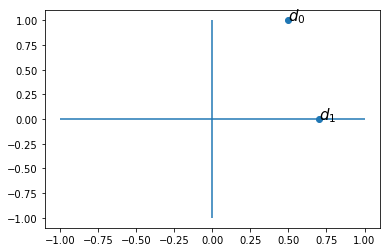

In [5]:
import matplotlib.pyplot as plt

d_0 = [0.5, 1]
d_1 = [0.7, 0]
fig, ax = plt.subplots()
ax.scatter([d_0[0], d_1[0]], [d_0[1], d_1[1]])
plt.hlines(0, xmin=-1, xmax=1)
plt.vlines(0, ymin=-1, ymax=1)
ax.annotate("$d_0$", d_0, fontsize=15)
ax.annotate("$d_1$", d_1, fontsize=15)

* Dies eröffnet viele neue Möglichkeiten!
* Nun kann mit Dokumenten gerechnet werden!

## Inhalt

* Wiederholung Grundlagen Vektoren
 * Theorie
 * Anwendung mit Python
* Anwendung im Vector Space Model
 * Ähnlichkeiten von Dokumenten
 * Heatmap Analyse
 * Ähnlichkeiten aller Länder zueinander

## Literatur

* [Han et al., Getting to know your data, Science direct](https://www.sciencedirect.com/topics/computer-science/cosine-similarity)
* [Manning et al., IR Book, Kapitel 6, Stanford](https://nlp.stanford.edu/IR-book/pdf/06vect.pdf)

## Einordnung in die Pipeline

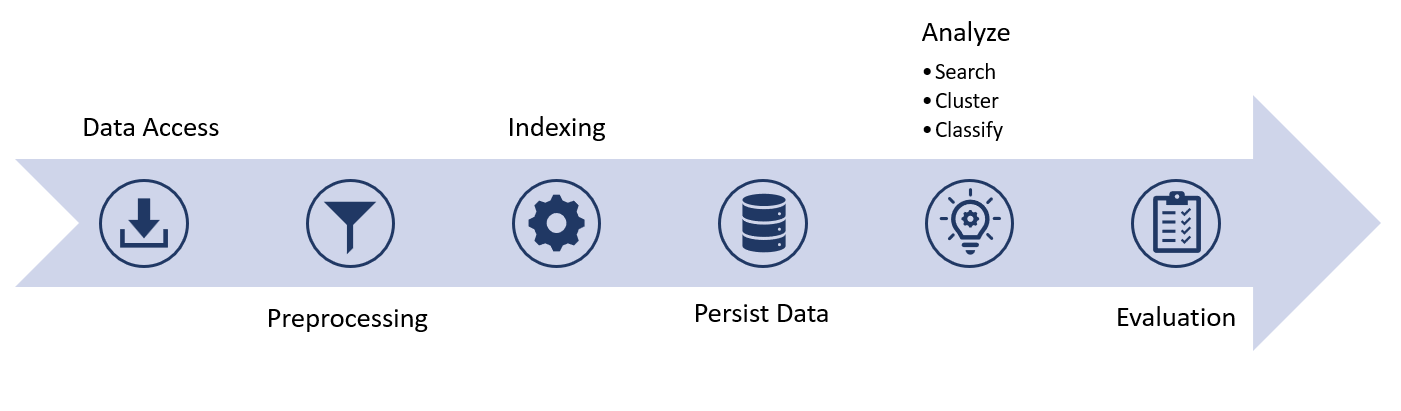

## Was sind nochmal Vektoren?
(Wiederholung Schulmathematik)

* Ein Punkt $p_i$ im $n$-dimensionalen Raum wird durch seinen Vektor $v_i$ beschrieben (Ortsvektor).
* Umgangssprachlich formuliert ist der Vektor die Wegbeschreibung wie man vom Ursprung $p_0$ zum Punkt $p_i$ gelangt.

* Mit Vektoren kann gerechnet werden.
* Für uns ist besonders interessant:
  * der Entfernung zwischen Punkten
    * Anwendung verschiedener Ähnlichkeitsmaße: Euklidische Distanz, Cosinus Distanz
  * Die Länge des Vektors
    * Entfernung vom Ursprung

#### Addition / Subtraktion / Multiplikation / Division

Die Addition bzw. Subtraktion zweier Vektoren $v$ und $w$ wird beschrieben durch:

$$
v + w = 
\begin{equation*}
\begin{pmatrix}
v_0 \\ v_1 
\end{pmatrix}
   +
\begin{pmatrix}
w_0 \\ w_1
\end{pmatrix}
\end{equation*}
=
\begin{pmatrix}
v_0 + w_0 \\ v_1 + w_1
\end{pmatrix}
$$

Also:

$$
\begin{equation*}
\begin{pmatrix}
-1 \\ 3 
\end{pmatrix}
   +
\begin{pmatrix}
1 \\ 2 
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 5 
\end{pmatrix}
\end{equation*}
$$

(Für Subtraktion / Multiplikation / Division analog)


#### Skalarprodukt (engl. dot product)

* Das Skalarprodukt ist die komponentweise Multiplikation und die anschließende Addition zweier Vektoren $v$ und $w$.
* Das Ergebnis ist ein Skalar, also eine Zahl (!).


$$
v \circ w = 
\begin{equation*}
\begin{pmatrix}
v_0 \\ v_1 
\end{pmatrix}
   \circ
\begin{pmatrix}
w_0 \\ w_1
\end{pmatrix}
\end{equation*}
=
\begin{pmatrix}
v_0 \cdot w_0 + v_1 \cdot w_1
\end{pmatrix}
$$

Also:

$$
\begin{equation*}
\begin{pmatrix}
1 \\ 2
\end{pmatrix}
   \circ
\begin{pmatrix}
0 \\ 5
\end{pmatrix}
\end{equation*}
=
\begin{pmatrix}
1 \cdot 0 + 2 \cdot 5
\end{pmatrix}
= 10
$$




* Zwei Vektoren stehen zueinander othogonal, wenn ihr Skalarprodukt $0$ ergibt.
* Beispiel:
$$
\begin{equation*}
\begin{pmatrix}
1 \\ 0
\end{pmatrix}
   \circ
\begin{pmatrix}
0 \\ 1
\end{pmatrix}
\end{equation*}
$$

#### Die Länge eines Vektors

* Die Länge eines Vektors $v$ ist seine euklidische Distanz vom Ursprung-
* Sie wird auch als der Betrag $|v|$ von $v$ bezeichnet.

* Berechnung der Länge von $v$ (euklidische Distanz):
$$
\begin{equation*}
|v| = \sqrt{ \sum^{n}_{i=0} v_i^{2}}
\end{equation*}
$$

#### Ähnlichkeit zwischen Vektoren

Für uns interessant:
* euklidische Distanz
* Cosinus Ähnlichkeit

#### Euklidische Distanz von $v$ zu $w$:

* "Räumliche Distanz"
* Je größer der Wert, desto weiter entfernt Sind die Punkte, die die Vektoren beschreiben.
$$
\begin{equation*}
|v|-|w| = \sqrt{ \sum^{n}_{i=0} (v_i - w_i)^{2}}
\end{equation*}
$$

#### Cosinus Ähnlichkeit von $v$ zu $w$:

* Berechnet den Cosinus des Winkels zwischen den beiden Vektoren.
* "Skalarprodukt geteilt durch das Produkt der Beträge der Vektoren"
* Der Wertebereich liegt dabei bei $[0, 2]$.
  * Die Vektoren haben den Nullwinkel für den Wert 0, sind sich also genau gleich.
  * Entgegengesetzte Richtung: 2
  * Orthogonal zueinander: 1

$$
\begin{equation*}
dist_{cos}(v,w) = 1 - \frac{v \circ w}
                    {|v| \cdot |w|}
\end{equation*}
$$

#### Wo liegt nun der Hauptunterschied beider Distanzmaße?

Wiederholung:
* Euklidische Distanz $\rightarrow$ Räumliche Distanz
* Cosinus Ähnlichkeit $\rightarrow$ Winkel zwischen den Vektoren 

* Die Cosinus Ähnlichkeit ist unabhängig von der Länge der Vektoren!!!
* Konkret heißt das für uns:
  * Die Vektoren, die unsere Dokumente beschreiben, haben unterschiedliche Längen. Diese stehen in _keinem_ Zusammenhang zu ihrer Ähnlichkeit.
* Deshalb:
  * nutzen Sie die euklidische Distanz: normieren Sie die Vektoren, d.h. bringen Sie sie auf die gleiche Länge
  * ODER: nutzen Sie die Cosinus Ähnlichkeit
* Aus diesem Grund hat sich die Cosinus Ähnlichkeit als Ähnlichkeitsmaß im Information Retrieval etabliert.

## Die Praxis mit Python

* Es bieten sich vor allem diie Module numpy und scipy an.
* Diese sind die Standards im Data Science Bereich und kompatibel mit quasi allen Python Modulen.
* numpy (numeric python):
  * rechnen mit arrays, matrizen und mehr
  * arrays können Vektoren sein.
* scipy (scientific python):
  * Implementierungen fundamentaler Algorithmen und Formeln
  * u.A. Cosinus-Distanz

### Kleiner numpy Crashkurs

In [6]:
import numpy as np

print("Erzeugung eines leeren 1-dimensionalen Arrays (Vektor):")
a = np.array([])
print(a)

print("Erzeugung eines Vektors mit Inhalt:")
a = np.array([1, 2, 3])
print(a)

print("Erzeugung eines Vektors der Länge n aus nur Nullen:")
a = np.zeros(5)
print(a)

Erzeugung eines leeren 1-dimensionalen Arrays (Vektor):
[]
Erzeugung eines Vektors mit Inhalt:
[1 2 3]
Erzeugung eines Vektors der Länge n aus nur Nullen:
[0. 0. 0. 0. 0.]


### Numpy Datenmanipulation
* arrays verhalten sich in dieser Hinsicht wie Listen

In [7]:
a = np.array([1, 2, 3])
print("Addidtion, Subtraktion, Multiplikation, Division")
print(a * 2)

print("Ausgabe des ersten Elements")
print(a[0])

print("Neuzuweisung des ersten Elements")
a[0] = 5
print(a)


Addidtion, Subtraktion, Multiplikation, Division
[2 4 6]
Ausgabe des ersten Elements
1
Neuzuweisung des ersten Elements
[5 2 3]


In [8]:
print("Form des Vektors")
print(a.shape)
print("Anzahl Felder")
print(a.size)

Form des Vektors
(3,)
Anzahl Felder
3


In [9]:
# Skalarproduct
v = np.array([1, 2, 3])
w = np.array([2, 2, 2])

print(np.dot(v, w))
# oder
v.dot(w)

12


12

In [10]:
# Betrag / Länge eines Vektors
v = np.array([1, 0])
np.linalg.norm(v)

1.0

In [11]:
# Cosinus Ähnlichkeit
v = np.array([1, 0])
w = np.array([0, 1])
1 - v.dot(w) / np.linalg.norm(v) * np.linalg.norm(w)

1.0

In [12]:
# oder
from scipy.spatial.distance import cosine
cosine(v, w)

1.0

# Aufgaben

Die Aufgaben setzen die Theorie bisher in die Praxis um. Sie sollen ein Gefühl für die Vektorrechnung in Python mit numpy-arrays bekommen.

1. Erstellen Sie ein Array (Vektor) $a$, das die Werte: 1, 2, 3, 4 und 5 enthält.
  * Addieren Sie zu jedem Wert des Arrays den Wert 1.
  * Ändern Sie den Wert des 2. Eintrags auf 10.
  * Berechnen Sie den Betrag des Vektors.
2. Erstellen Sie einen zweiten Vektor $b$ mit dem Inhalt: 1, 0, 0, 1, 2.
  * Berechnen Sie die euklidische Distanz von $a$ und $b$.
  * Berechnen Sie dei Cosinus Ähnlichkeit von $a$ und $b$.
3. Multiplizieren Sie alle Werte von $a$ mit dem Wert 10 und nennen Sie diesen nun $a_2$.
  * Berechnen Sie erneut die euklidische Distanz und Cosinus Ähnlichkeit von nun $a_2$ und $b$.
  * Was fällt Ihnen auf?

In [24]:
a = np.array([1, 2, 3, 4, 5])
a + np.array([1,1,1,1,1])
a[1]=10
np.linalg.norm(a)


12.288205727444508

In [28]:
b = np.array([1,0,0,1,2])
print(np.linalg.norm(a-b))
1 - np.dot(a,b) / (np.linalg.norm(a) * np.linalg.norm(b))


11.269427669584644


0.5016583793611784

In [19]:
from scipy.spatial.distance import cosine
cosine(a, b)

0.5016583793611784

In [27]:
a2 = a*10
print(np.linalg.norm(a2))
cosine(a2, b)

122.88205727444507


0.5016583793611784

# TF-IDF und das Vector Space Modell

* Die Funktionsweise und die Implementierung wird für das Folgende vorrausgesetzt.
* Wir werden nun die Dokumente unseres Country-Corpus mit TF-IDF in den Vektorraum bringen!


**Bekannte Probleme**:
* Wie wir in der Veranstaltung bereits nachgewiesen:
  * sollte eine Datenreinigung vorgenommen werden (z.B. nach Kapitel Weblinks, Einzelnachweise)
  * dies bläht den Korpus mit einzigartigen Tokens auf
  * erhöht in diesem Fall die Dimensionalit $n$ drastisch und damit die benötigte Rechenkapazität.
* Deshalb werden hier nur 100 Dokumente geladen.

In [30]:
from glob import glob

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from tqdm.notebook import tqdm

In [36]:
string = "Ich freue mich etwas über TF-IDF zu lernen."
tokenizer = RegexpTokenizer("\w+")
tokenizer.tokenize(string)

stopwords_ger = set(stopwords.words("german"))

def tok(text):
    tokens = tokenizer.tokenize(text)
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t not in stopwords_ger]
    return tokens

DATA = "..\countries\countries\*txt"
documents_raw = {}
for file in tqdm(glob(DATA)[:100]):
    with open(file, "r", encoding="utf8") as f:
        data = f.read().lower()
        filename = file.split("\\")[-1].split(".")[0]
    # compare to only use tokenizer.tokenize()
    documents_raw[filename] = data

print("Loaded", len(documents_raw), "documents.")
    
# tokenize
documents = {}
for name, doc in documents_raw.items():
    documents[name] = (tok(doc))
    
    
def get_tf(corpus):
    # computing the tf for each document in the corpus.
    tf = {}
    for name, document in corpus.items():
        tf_d = {}
        for token in document:
            # term freq (tf)
            if token in tf_d:
                tf_d[token] += 1
            else:
                tf_d[token] = 1
        tf[name] = tf_d
    return tf

def get_idf(corpus):
    # do df, then to idf
    df = {}
    for document in corpus.values():
        # important: cast to set here, to count a token for each doc only once!
        document = set(document)
        for token in document:
            if token in df:
                df[token] += 1
            else:
                df[token] = 1

    # do idf
    N = len(documents)
    idf = {token: np.log10(N / d_freq) for token, d_freq in df.items()}
    return idf, df


# tf-idf
def tfidf_weighting(token, tf_d, idf):
    """
    :param token: The token to compute the weight for.
    :param df: dictionary with the term frequency for each token in the document
    :param idf: the inverse document frequency.
    """
    return tf_d[token] * idf[token]


tf = get_tf(documents)
idf, df = get_idf(documents)

  0%|          | 0/100 [00:00<?, ?it/s]

Loaded 100 documents.


#### Sortierung des Vokabulars alphabetisch

In [37]:
vocab = sorted(list(idf.keys()))
len(vocab)

79220

In [38]:
def build_doc_vector(doc_id):
    vector = np.zeros(len(vocab))
    for token in tf[doc_id].keys():
        vector[vocab.index(token)] = tfidf_weighting(token, tf[doc_id], idf)
    return vector


def build_doc_vector2(doc_id):
    return np.array(list(df[doc_id].values()))

v = build_doc_vector("deutschland")

In [39]:
# die ersten 10 TF-IDF Werte
v[:10]

array([0.72424345, 0.        , 1.81060863, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [40]:
def build_all_vecs(docs):
    vectors = {}
    for doc in tqdm(docs):
        print(doc)
        vectors[doc] = build_doc_vector(doc)
    return vectors

docs = tf.keys()
document_vectors = build_all_vecs(docs)

  0%|          | 0/100 [00:00<?, ?it/s]

afghanistan
agypten
albanien
algerien
andorra
angola
anguilla
antarktis
antigua-und-barbuda
aquatorial-guinea
argentinien
armenien
aruba
aserbaidschan
athiopien
australien
bahamas
bahrain
bangladesh
barbados
belgien
belize
benin
bermudas
bhutan
birma
bolivien
bosnien-herzegowina
botswana
bouvet-inseln
brasilien
britisch-indischer-ozean
brunei
bulgarien
burkina-faso
burundi
chile
china
christmas-island
cook-inseln
costa-rica
danemark
deutschland
djibuti
dominika
dominikanische-republik
ecuador
el-salvador
elfenbeinkuste
eritrea
estland
falkland-inseln
faroer-inseln
fidschi
finnland
frankreich
franzosisch-guyana
franzosisch-polynesien
franzosisches-sud-territorium
gabun
gambia
georgien
ghana
gibraltar
grenada
griechenland
grobritannien
gronland
guadeloupe
guam
guatemala
guinea-bissau
guinea
guyana
haiti
heard-und-mcdonald-islands
honduras
hong-kong
indien
indonesien
irak
iran
irland
island
israel
italien
jamaika
japan
jemen
jordanien
jugoslawien
kaiman-inseln
kambodscha
kamerun
kanada
ka

* Wir erhalten ein Dictionary in der Form
```
{"land1": array([1, 2, 3,...])}
```
* Wir formen daraus die Dokumentmatrix $D$:
  * Die Anzahl Tokens im Korpus sind die Dimensionen $n$ (Spalten).
  * Die Anzahl Dokumente im Korpus sind $i$ (Zeilen).

$$
\begin{equation*}
D =
\begin{pmatrix}
d_{0,0} & d_{0,1} & ... & d_{0,n}\\
d_{1,0} & d_{1,1} & ... & d_{1,n}\\
...     & ...     & ... & ...  \\
d_{i,0} & d_{i,1} & ... & d_{i,n}\\
\end{pmatrix}
\end{equation*}
$$

In [41]:
D = np.array([*document_vectors.values()])

In [42]:
# Größe von D
D.shape

(100, 79220)

In [158]:
D.size

7922000

### Zwischenfazit

* Unser gesamtes abgeleitetes Wissen über den Korpus befindet sich nun in $D$.
* Das Wissen wird also nur noch mit Zahlen repräsentiert.
* D besteht hier aus 2379550 Zahlen.

## Die Ähnlichkeit von Dokumenten berechnen:

In [43]:
def get_doc_id(country):
    return list(docs).index(country)

get_doc_id("deutschland")

42

In [44]:
deutschland = get_doc_id("deutschland")
frankreich = get_doc_id("frankreich")

cosine(D[deutschland], D[frankreich])

0.8848329133696968

### Suche des ähnlichsten Dokuments zum Dokument "Deutschland"

In [45]:
def most_similar_to(doc_id, values=True):
    corpus_docs = list(tf.keys())
    similarities = pd.DataFrame(columns=["doc", "similarity"])
    for i in range(D.shape[0]):
        cosine_distance = cosine(D[i], D[doc_id])
        similarities = similarities.append({"doc": corpus_docs[i], "similarity": cosine_distance}, ignore_index=True)
    if values is True:
        return similarities.sort_values("similarity", ascending=True)
    else:
        return similarities["similarity"]

most_similar_to(deutschland)

,doc,similarity
42,deutschland,0.000000
55,frankreich,0.884833
85,italien,0.921214
41,danemark,0.930595
65,griechenland,0.939472
...,...,...
23,bermudas,0.991556
75,heard-und-mcdonald-islands,0.992292
91,kaiman-inseln,0.992641
6,anguilla,0.992846


## Was sehen wir?

* Wichtig: Ergebnisse **IMMER** interpretieren!
* Findings (100 Länder only Country-Corpus):
  1. Deutschland hat zu sich selbst die maximale Ähnlichkeit von 0 (ist ja auch logisch).
  2. Danach kommt lange nichts, alle anderen Länder sind zwischen 0,88 und ~1.
    * Was bedeuted das? Warum ist das so?
  3. Immerhin sind Nachbarländer wie Frankreich und Dänemark, aber auch Italien auf den folgenden Plätzen.

* Im $n$-dimensionalen Raum, auf den die Dokumente abgebildet werden, stehen also alle anderen Dokumente quasi _orthogonal_ (cosinus Ähnlichkeit = 1) zu dem Dokument "Deutschland".

## Warum sind die Dokumente "so" unterschiedlich zueinander?

* Wie bereits erwähnt: schlechtes data cleaning.
  * etwa sollten bestimmte Kapitel entfernt werden.
* Mit TF-IDF wird _nicht_ die Semantik der Dokumente erfasst. TF-IDF ist ein statistisches Verfahren für die untersuchen der Häufigkeit von Tokens.
  * Dies wird in einem anderen Kapitel behandelt.
* Es sind Sachartikel: Jedes Land hat einzigartike Tokens, vor allem Eigennamen wie Geographische Gegebenheiten, die es von anderen Ländern deutlich unterscheidet.
* Die Vektoren haben eine sehr hohe Dimension. Zudem sind sie wiederum sparse. Die Daten sollten mit entsprechenden Verfahren in einen niedrig-dimensionaleren Raum transformiert werden um die Informationsdichte zu erhöhen.
  * Auch das wird in einem anderen Kapitel behandelt.

### Berechnung aller Ähnlichkeiten aller Dokumente

* Bei der Größe $m$ des Korpus entsteht so eine Matrix mit der Größe $m \times m$.

In [46]:
similarities = np.empty((100, 100))
for i in tqdm(range(D.shape[0])):
    similarities[i] = most_similar_to(i, False)

  0%|          | 0/100 [00:00<?, ?it/s]

### Analyse der Ähnlichkeitsmatrix
* Wir können die Ähnlichkeitsmatrix in einer Heatmap visualisieren.
* Je heller die Punkte sind, desto ähnlicher sind sich Dokumente.
* Typisch ist die "diagonale Linie" bei solch einer Visualisierung, da dort immer jeweils das selbe Dokument betrachtet wurde.
* Eine Heatmap eignet sich besonders, um zunächst einen Überblick zu bekommen.

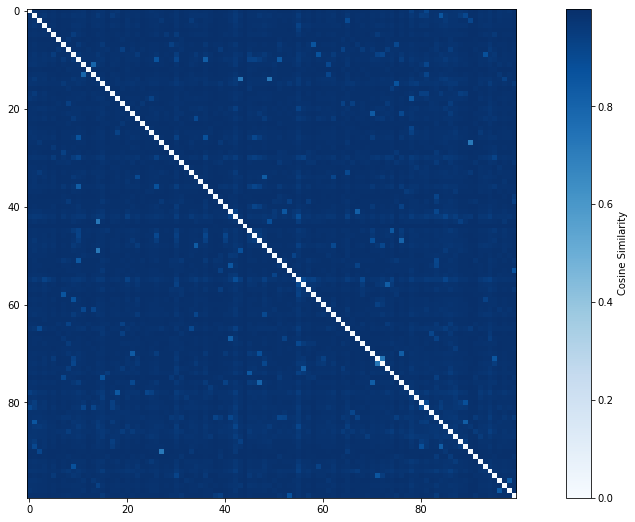

In [47]:
fig, ax = plt.subplots(figsize=(18, 9))
ax = plt.imshow(similarities, cmap='Blues', interpolation='nearest')
plt.colorbar(ax, label="Cosine Similarity")

### Analsyse der Heatmap

* Es gibt einige helleren Punkte
* Manche Länder ziehen Linien durch die gesamte Grafik. Diese haben anscheinend eine auffällig höhere Ähnlichkeit zum gesamten Korpus
* Es lohnt sich also ein Blick auf das ähnlichste Dokument zu jedem Land

#### Erstellung einer Tabelle für jedes Land mit dem ähnlichsten Land

In [48]:
most_similar = pd.DataFrame(columns=["country", "most-similarity", "value"])
docs = list(docs)
# iterate over all country's calculated similarities
for i, s in enumerate(similarities):
    # get the indices with the lowest consine similarity
    similars = np.argsort(s)
    # get for each country, its name, the most similar name and the similarity value
    most_similar = most_similar.append({"country": docs[i], 
                                        "most-similarity": docs[similars[1]],
                                        "value": s[similars[1]]
                                       }, ignore_index=True)
    # sort ascending
    most_similar = most_similar.sort_values("value", ascending=True)

In [49]:
# save to csv
most_similar.to_csv("most_similar_countures_tfidf.csv", sep=";")

Hier lohnt es sich die Tabelle auch einmal in Excel o.Ä. zu betrachten:

In [50]:
most_similar

,country,most-similarity,value
0,bosnien-herzegowina,jugoslawien,0.718509
1,jugoslawien,bosnien-herzegowina,0.718509
2,athiopien,eritrea,0.718865
3,eritrea,athiopien,0.718865
4,djibuti,athiopien,0.726303
...,...,...,...
94,anguilla,antigua-und-barbuda,0.974820
95,burundi,belgien,0.977757
96,aruba,belgien,0.984614
97,gibraltar,algerien,0.987464


### Analyse der "Top-Matches"

* Die ähnlichsten Länder generell sind Bosnien-Herzegowina und Jugoslawien
  * Die Ähnlichkeit macht semantisch hier Sinn. Was meinen Sie?
* Es gibt viele weitere gute Matches, die auch Semantisch sinnhaftig scheinen.
* Andererseits gibt es auch Matches die nicht direkt sinnhaftig erscheinen.
  * z.B. Burundi und Belgien: Nach einer kurzen Internetrecherche haben beide Länder wohl eine gemeinsame Kolonialgeschichte. Man lernt immer wieder dazu.
* Es entsteht der Eindruck, Länder sind sich basierend auf dieser Analyse ähnlich wenn:
  * gemeinsane Geschichte, Kolonialzeit
  * geographisch ähnliche Lage
  * weitere?
* Jedenfalls: Die Ähnlichkeitswerte sind trotzdem sehr hoch (schlecht), auch für die Top-Machtes. Dies kann auch wiederum viele Gründe haben:
  * schlechtes Data Cleaning / Preprocessing
  * unterschiedlicher Schreibstil der Autoren
  * sehr spezifische Text, es sind ja immer noch Sachtexte.

# Fazit und Zusammenfassung

* Das Vector Space Model ist ein sehr mächtiges Model für das "Rechnen" mit Dokumenten.
* Als Überführung in den Vector Space nutzten wir hier TF-IDF. Dabei wird jedoch die Semantik nicht mit einbezogen.
* Rechnen im Vector Space wird mit Werkzeugen aus der linearen Algebra gemacht.
* Wir sehen erneut: Eine guten Datenvorverarbeitung (Pipeline Schritt 2) könnte das Ergebnis hier noch verbessern!

**Der Country Korpus eignet sich wohl auch nicht für eine spannende Ähnlichkeitsuntersuchung, einfach bereits aufgrund seiner Domäne.**

# Aufgaben

Sie haben nun 2 Wochen Zeit. Nutzen Sie diese entweder/und für Wiederholungen und Vertiefungen.

### Teil A
* Machen Sie ein ausführliches Preprocessing in Schritt 2 (gewissenhafter als ich es für die Demos tue). z.B.
  * 
* Das Ziel soll die Verbesserung der Qualität der Ähnlichkeitsberechungen mit den TF-IDF Vektoren sein.
* **Schaffen Sie es Ähnlichkeitswerte generell oder in einzelnen Fällen zu senken?** Vergleichen Sie mit den Ergebnissen zuvor.


### Teil B

Auch mit Elastic Search können Sie ähnliche Dokumente zu einem gegebenen Dokument basierend auf deren TF-IDF Vektors finden.

* Machen Sie sich mit den ES-Endpoints [Term Vectors API](https://www.elastic.co/guide/en/elasticsearch/reference/8.0/docs-termvectors.html#docs-termvectors-artificial-doc) und ["More like this query"](https://www.elastic.co/guide/en/elasticsearch/reference/8.0/query-dsl-mlt-query.html) vertraut.
  * Nutzen Sie dazu ruhig die Kibana Konsole und ein paar Dummy/Test-Dokumente.
* Wenden Sie nun die Query auf den Country-Corpus an. Suchen Sie ähnliche Dokumente:
  * welche Dokumente sind ähnlich zum Dokument "Deutschland" (Sie können natürlich auch gerne ein anderes Dokument nehmen)?
  * Welche Unterschiede gibt es im Vergleich zu unserer Implementierung? Woran könnte das liegen?